In [1]:
import sys
import os
sys.path.append('../dags')

from database import create_database_engine


# 환경 변수 설정
os.environ["POSTGRES_USER"] = "airflow"
os.environ["POSTGRES_PASSWORD"] = "airflow"
os.environ["POSTGRES_DB"] = "events"
os.environ["POSTGRES_PORT"] = "5433"

engine = create_database_engine(host="127.0.0.1")
print("Successfully connected to the database")

Successfully connected to the database


In [2]:
import pandas as pd
from datetime import datetime
table = "kind"
# 날짜 범위 설정
start_date = datetime(2022, 7, 1)
end_date = datetime(2023, 12, 31)

query = f"""SELECT * FROM {table}
WHERE stock_code != ''
  AND market IN ('KOSPI', 'KOSDAQ', 'KOSDAQ GLOBAL')
  AND disclosed_at >= %(start_date)s
  AND disclosed_at <= %(end_date)s
  AND label is not NULL
ORDER BY disclosed_at ASC"""

df = pd.read_sql(query, engine, params={"start_date": start_date, "end_date": end_date})
print(f"데이터베이스에서 조회된 공시 이벤트 수: {len(df)}")
df.head()


DETAIL:  The database was created using collation version 2.36, but the operating system provides version 2.41.
HINT:  Rebuild all objects in this database that use the default collation and run ALTER DATABASE events REFRESH COLLATION VERSION, or build PostgreSQL with the right library version.


데이터베이스에서 조회된 공시 이벤트 수: 9808


,id,disclosure_id,disclosed_at,company_name,stock_code,short_code,market,title,summary_kr,raw,detail_url,created_at,updated_at,is_modify,disclosure_type,dart_unique_id,masked,label
0,325697,20220701000005,2022-07-01 07:49:00,CG인바이츠,KR7083790006,083790,KOSDAQ,투자판단 관련 주요경영사항(임상 2상 시험계획 조기 종료 신청),이 임상2상 시험은 코로나19 환자에서 카모스타트의 유효성과 안전성을 평가하기 위해...,1. 제목: 코로나19 바이러스(SARS-CoV-2) 감염이 확진된 COVID-19...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-10-20 06:55:14.045559,2025-10-28 02:53:39.321648,0,임상 계획 신청,,이 임상2상 시험은 코로나19 환자에서 회사 A의 유효성과 안전성을 평가하기 위해 ...,-1
1,325691,20220701000107,2022-07-01 10:03:00,강원에너지,KR7114190002,114190,KOSDAQ,타법인주식및출자증권취득결정(자율공시),"강원이솔루션은 2022년 7월 1일 이차전지 사업의 핵심기술 확보를 위해 20,00...",1. 발행회사\n회사명(국적): 주식회사\n강원이솔루션\n(대한민국)\n대표이사: ...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-10-20 06:55:14.045559,2025-10-28 02:53:39.321648,0,타법인 주식 및 출자증권 양수결정,,"회사 A는 2022년 7월 1일 이차전지 사업의 핵심기술 확보를 위해 20,000주...",1
2,325686,20220701000122,2022-07-01 10:24:00,비츠로셀,KR7082920000,082920,KOSDAQ,단일판매ㆍ공급계약체결,"회사는 방위사업청과 15,107,298,910원 규모의 리튬전지류 및 기뢰정비장비용...",1. 판매ㆍ공급계약 내용: 방위사업청 공급계약 (리튬전지류 및 기뢰정비장비용 전지조...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-10-20 06:55:14.045559,2025-10-28 02:53:39.321648,0,단일판매ㆍ공급계약체결,,"회사 A는 방위사업청과 15,107,298,910원 규모의 리튬전지류 및 기뢰정비장...",1
3,325685,20220701000123,2022-07-01 10:26:00,비츠로테크,KR7042370007,042370,KOSDAQ,단일판매ㆍ공급계약체결(자회사의 주요경영사항),해당 기업은 방위사업청과 2022년 6월에 공급계약을 체결하여 전지조립체를 공급했으...,1. 판매ㆍ공급계약 내용: 방위사업청 공급계약 (리튬전지류 및 기뢰정비장비용 전지조...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-10-20 06:55:14.045559,2025-10-28 02:53:39.321648,0,단일판매ㆍ공급계약체결,,해당 기업은 방위사업청과 2022년 6월에 공급계약을 체결하여 전지조립체를 공급했으...,0
4,325676,20220701000136,2022-07-01 10:43:00,동원시스템즈,KR7014820005,014820,KOSPI,신규시설투자등(자율공시),이 기업은 충청남도 아산시에 위치한 2차전지 캔 신공장 건설을 위해 약 585억 원...,1. 투자구분: 신규시설투자\n- 투자대상: 2차전지 캔 신공장 신축공사\n2. 투...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-10-20 06:55:14.045559,2025-10-28 02:53:39.321648,0,신규시설투자,,이 기업은 충청남도 아산시에 위치한 2차전지 캔 신공장 건설을 위해 약 585억 원...,0


시장별 공시 분포:
market
KOSDAQ    5753
KOSPI     4055
Name: count, dtype: int64

총 공시 건수: 9808

시장별 비율:
KOSDAQ: 5753건 (58.7%)
KOSPI: 4055건 (41.3%)


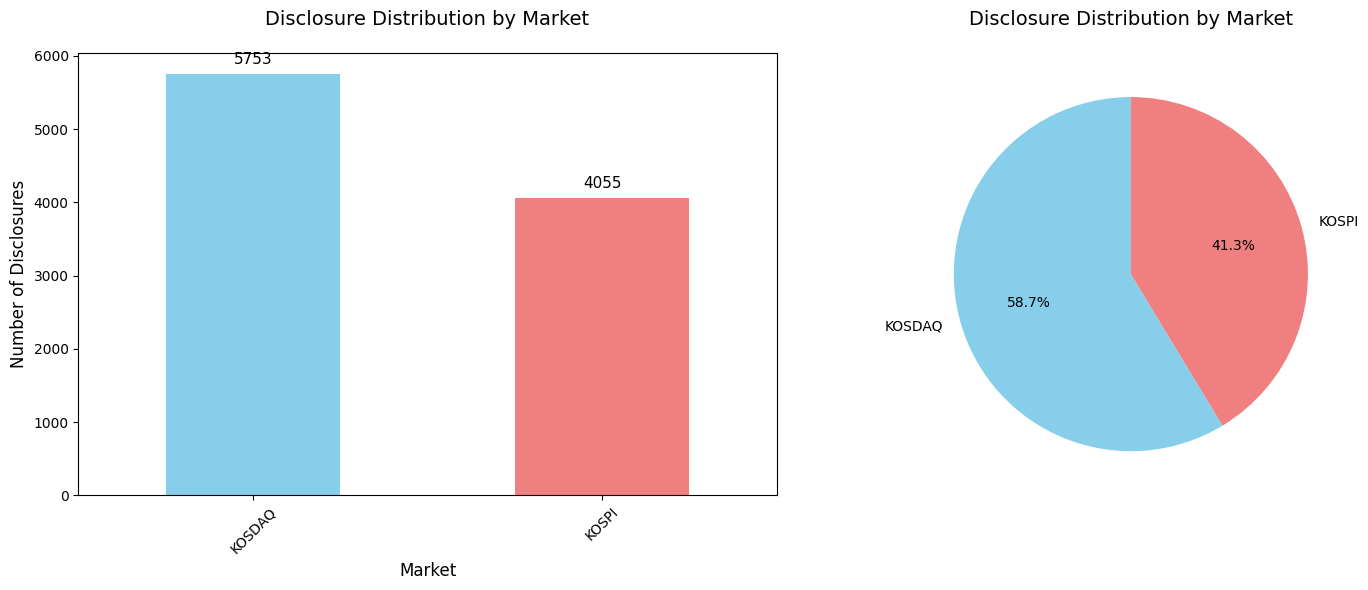

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# market 종류와 각각의 비율 분석
market_counts = df['market'].value_counts()
print("시장별 공시 분포:")
print(market_counts)
print(f"\n총 공시 건수: {len(df)}")
print("\n시장별 비율:")
for market, count in market_counts.items():
    ratio = count / len(df) * 100
    print(f"{market}: {count}건 ({ratio:.1f}%)")

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 막대 그래프
market_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Disclosure Distribution by Market', fontsize=14, pad=20)
ax1.set_xlabel('Market', fontsize=12)
ax1.set_ylabel('Number of Disclosures', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# 각 막대 위에 값 표시
for i, v in enumerate(market_counts.values):
    ax1.text(i, v + len(df)*0.01, str(v), ha='center', va='bottom', fontsize=11)

# 파이 차트
market_ratios = market_counts / len(df) * 100
ax2.pie(market_ratios.values, labels=market_ratios.index, autopct='%1.1f%%', 
        startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
ax2.set_title('Disclosure Distribution by Market', fontsize=14, pad=20)

plt.tight_layout()
plt.show()


공시 발표 시간대별 분포 (KST 기준):
market_session
After Hours      5944
Trading Hours    3864
Name: count, dtype: int64

장중 비율: 39.4%
장외 비율: 60.6%


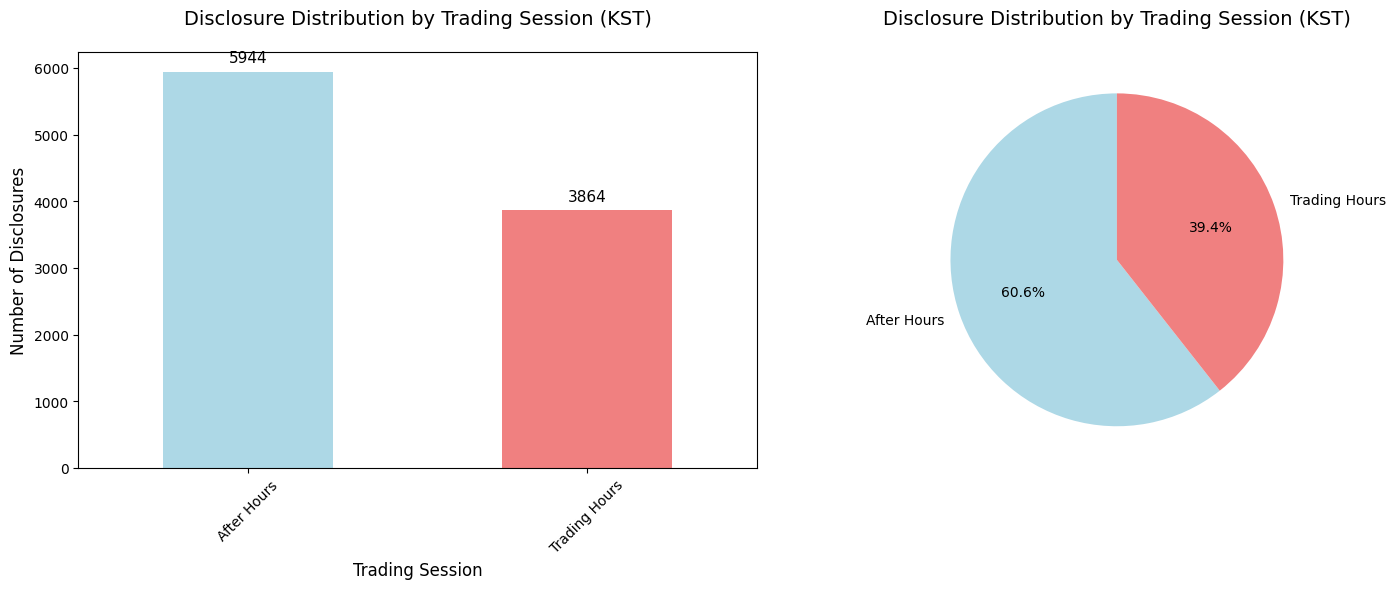

<Figure size 640x480 with 0 Axes>

In [4]:
# disclosed_at을 datetime으로 변환 (이미 KST 기준으로 저장됨)
df['disclosed_at'] = pd.to_datetime(df['disclosed_at'])

# 이미 KST 기준이므로 그대로 사용
df['disclosed_at_kst'] = df['disclosed_at']
df = df.sort_values('disclosed_at_kst')
df['time_only'] = df['disclosed_at_kst'].dt.time

# 장중 시간 정의 (9:00 ~ 15:20) - KST 기준
import datetime
market_open = datetime.time(9, 0)
market_close = datetime.time(15, 20)

# 장중/장외 분류
df['market_session'] = df['time_only'].apply(
    lambda x: 'Trading Hours' if market_open <= x <= market_close else 'After Hours'
)

# 결과 집계
session_counts = df['market_session'].value_counts()
print("공시 발표 시간대별 분포 (KST 기준):")
print(session_counts)
print(f"\n장중 비율: {session_counts.get('Trading Hours', 0) / len(df) * 100:.1f}%")
print(f"장외 비율: {session_counts.get('After Hours', 0) / len(df) * 100:.1f}%")

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 막대 그래프
session_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Disclosure Distribution by Trading Session (KST)', fontsize=14, pad=20)
ax1.set_xlabel('Trading Session', fontsize=12)
ax1.set_ylabel('Number of Disclosures', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# 각 막대 위에 값 표시
for i, v in enumerate(session_counts.values):
    ax1.text(i, v + len(df)*0.01, str(v), ha='center', va='bottom', fontsize=11)

# 파이 차트
session_ratios = session_counts / len(df) * 100
ax2.pie(session_ratios.values, labels=session_ratios.index, autopct='%1.1f%%', 
        startangle=90, colors=['lightblue', 'lightcoral'])
ax2.set_title('Disclosure Distribution by Trading Session (KST)', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
from datetime import datetime

TABLE = "abnormal_return_kind_log"
# abnormal return 컬럼
abn_return_cols = (
    [f"abn_ret_minus_{i}m" for i in range(59, 0, -1)] +
    ["abn_ret_0m"] +
    [f"abn_ret_{i}m" for i in range(1, 61)]
)

# abn_return_cols를 쿼리 내에서 컬럼명 문자열로 변환
abn_return_col_str = ",\n    ".join(abn_return_cols)

query = f"""
SELECT ar.event_id,
    ar.event_ts,
    {abn_return_col_str},
    k.company_name,
    k.disclosure_type,
    k.masked,
    k.label
FROM {TABLE} ar
JOIN "kind" k ON ar.event_id = k.id
WHERE k.disclosed_at >= '{start_date.strftime('%Y-%m-%d')}'
  AND k.disclosed_at <= '{end_date.strftime('%Y-%m-%d')}'
ORDER BY k.disclosed_at ASC
"""

target_df = pd.read_sql(query, engine)
target_df

,event_id,event_ts,abn_ret_minus_59m,abn_ret_minus_58m,abn_ret_minus_57m,abn_ret_minus_56m,abn_ret_minus_55m,abn_ret_minus_54m,abn_ret_minus_53m,abn_ret_minus_52m,...,abn_ret_55m,abn_ret_56m,abn_ret_57m,abn_ret_58m,abn_ret_59m,abn_ret_60m,company_name,disclosure_type,masked,label
0,325691,2022-07-01 10:03:00+00:00,-0.007148,-0.005285,0.000471,-0.012082,0.008214,-0.002471,0.000944,-0.006312,...,0.000000,-0.001969,0.007349,-0.000450,0.004910,-0.000482,강원에너지,타법인 주식 및 출자증권 양수결정,"회사 A는 2022년 7월 1일 이차전지 사업의 핵심기술 확보를 위해 20,000주...",1
1,325686,2022-07-01 10:24:00+00:00,0.000476,0.000476,-0.007229,-0.000477,-0.002379,-0.001425,-0.000949,0.008139,...,-0.000965,0.000483,-0.000965,0.001931,-0.000483,-0.000483,비츠로셀,단일판매ㆍ공급계약체결,"회사 A는 방위사업청과 15,107,298,910원 규모의 리튬전지류 및 기뢰정비장...",1
2,325685,2022-07-01 10:26:00+00:00,0.002865,-0.000477,-0.002379,0.000009,0.003340,0.002373,-0.000476,-0.002376,...,-0.002390,0.001931,-0.000483,-0.000483,0.000483,-0.000483,비츠로테크,단일판매ㆍ공급계약체결,해당 기업은 방위사업청과 2022년 6월에 공급계약을 체결하여 전지조립체를 공급했으...,0
3,325676,2022-07-01 10:43:00+00:00,-0.000162,-0.001130,-0.000968,0.000322,-0.000967,-0.000644,0.000161,-0.003180,...,0.002006,0.000326,-0.000489,-0.001517,-0.000163,0.000815,동원시스템즈,신규시설투자,이 기업은 충청남도 아산시에 위치한 2차전지 캔 신공장 건설을 위해 약 585억 원...,0
4,325672,2022-07-01 11:03:00+00:00,0.000968,0.002677,-0.000773,-0.001581,-0.000484,-0.001068,0.000162,-0.001101,...,-0.000490,0.001876,-0.001264,0.000000,-0.001428,0.000163,HD현대미포,단일판매ㆍ공급계약체결,"이 회사 A는 오세아니아의 선주와 LPG선 1척 공급 계약을 체결했으며, 계약금액은...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,375890,2023-12-28 14:46:00+00:00,-0.000361,0.000000,-0.000946,0.000585,0.000361,-0.000721,0.001305,-0.002251,...,NaN,NaN,NaN,NaN,NaN,NaN,윤성에프앤씨,단일판매ㆍ공급계약체결,이 회사는 2차전지 믹싱시스템 공급을 위한 계약을 2023년 12월 27일에 체결하...,1
3580,375886,2023-12-28 14:53:00+00:00,-0.000883,0.000139,-0.003026,-0.000327,-0.000418,-0.001025,-0.000279,-0.000418,...,NaN,NaN,NaN,NaN,NaN,NaN,까뮤이앤씨,단일판매ㆍ공급계약체결,이 회사는 전라남도 목포시에서 진행 중인 수산식품 수출단지 조성 건축공사 수주 계약...,1
3581,375978,2023-12-28 14:56:00+00:00,0.000279,-0.000418,-0.000418,-0.000279,0.004040,0.000139,-0.002226,0.005926,...,NaN,NaN,NaN,NaN,NaN,NaN,한창,주권 관련 사채권 양수 결정,"회사 A는 2023년 12월 28일 13회차 전환사채를 취득했으며, 이는 종속회사인...",0
3582,375977,2023-12-28 14:56:00+00:00,0.000279,-0.000418,-0.000418,-0.000279,0.004040,0.000139,-0.002226,0.005926,...,NaN,NaN,NaN,NaN,NaN,NaN,한창,주권 관련 사채권 양수 결정,회사 A는 2023년 12월 28일에 16회차 무기명식 이권부 무보증 사모 전환사채...,0


In [6]:
for m in range(1, 11):
    plus_cols = [
        f"abn_ret_minus_{abs(i)}m" if i < 0 else f"abn_ret_{i}m"
        for i in range(-m+1, m + 1)
    ]
    target_df[f"CAR_{m}m"] = target_df[plus_cols].sum(axis=1)
    



In [7]:
for m in range(10, 61, 10):
    plus_cols = [
        f"abn_ret_minus_{abs(i)}m" if i < 0 else f"abn_ret_{i}m"
        for i in range(-m+1, m + 1)
    ]
    target_df[f"CAR_{m}m"] = target_df[plus_cols].sum(axis=1)
    



In [8]:
print("\n=== 기본 데이터 분석 ===")

# 컬럼 정보
print(f"컬럼 수: {len(target_df.columns)}")
print(f"컬럼명: {list(target_df.columns)}")

# 데이터 타입
print("\n데이터 타입:")
print(target_df.dtypes)

# 결측값 확인
print("\n결측값 현황:")
print(target_df.isnull().sum())


=== 기본 데이터 분석 ===
컬럼 수: 141
컬럼명: ['event_id', 'event_ts', 'abn_ret_minus_59m', 'abn_ret_minus_58m', 'abn_ret_minus_57m', 'abn_ret_minus_56m', 'abn_ret_minus_55m', 'abn_ret_minus_54m', 'abn_ret_minus_53m', 'abn_ret_minus_52m', 'abn_ret_minus_51m', 'abn_ret_minus_50m', 'abn_ret_minus_49m', 'abn_ret_minus_48m', 'abn_ret_minus_47m', 'abn_ret_minus_46m', 'abn_ret_minus_45m', 'abn_ret_minus_44m', 'abn_ret_minus_43m', 'abn_ret_minus_42m', 'abn_ret_minus_41m', 'abn_ret_minus_40m', 'abn_ret_minus_39m', 'abn_ret_minus_38m', 'abn_ret_minus_37m', 'abn_ret_minus_36m', 'abn_ret_minus_35m', 'abn_ret_minus_34m', 'abn_ret_minus_33m', 'abn_ret_minus_32m', 'abn_ret_minus_31m', 'abn_ret_minus_30m', 'abn_ret_minus_29m', 'abn_ret_minus_28m', 'abn_ret_minus_27m', 'abn_ret_minus_26m', 'abn_ret_minus_25m', 'abn_ret_minus_24m', 'abn_ret_minus_23m', 'abn_ret_minus_22m', 'abn_ret_minus_21m', 'abn_ret_minus_20m', 'abn_ret_minus_19m', 'abn_ret_minus_18m', 'abn_ret_minus_17m', 'abn_ret_minus_16m', 'abn_ret_minus_15

In [9]:
car_cols = [f'CAR_{m}m' for m in range(10, 61, 10)]
target_df[car_cols].describe().round(4)


,CAR_10m,CAR_20m,CAR_30m,CAR_40m,CAR_50m,CAR_60m
count,3584.0000,3584.0000,3584.0000,3584.0000,3584.0000,3584.0000
mean,0.0094,0.0090,0.0088,0.0105,0.0099,0.0096
std,0.0247,0.0249,0.0256,0.0308,0.0325,0.0327
min,-0.1309,-0.1608,-0.2359,-0.2576,-0.2649,-0.2542
25%,-0.0006,-0.0014,-0.0017,-0.0018,-0.0026,-0.0033
50%,0.0042,0.0044,0.0043,0.0050,0.0049,0.0047
75%,0.0131,0.0138,0.0142,0.0154,0.0162,0.0161
max,0.2582,0.2831,0.2841,0.2821,0.2886,0.2949


In [10]:
car_cols = [f'CAR_{m}m' for m in range(1, 11)]
target_df[car_cols].describe().round(4)


,CAR_1m,CAR_2m,CAR_3m,CAR_4m,CAR_5m,CAR_6m,CAR_7m,CAR_8m,CAR_9m,CAR_10m
count,3584.0000,3584.0000,3584.0000,3584.0000,3584.0000,3584.0000,3584.0000,3584.0000,3584.0000,3584.0000
mean,0.0123,0.0119,0.0115,0.0110,0.0105,0.0100,0.0096,0.0095,0.0095,0.0094
std,0.0224,0.0240,0.0251,0.0257,0.0254,0.0252,0.0246,0.0242,0.0245,0.0247
min,-0.0860,-0.0763,-0.0896,-0.1047,-0.1085,-0.1391,-0.1284,-0.1237,-0.1389,-0.1309
25%,0.0003,0.0004,0.0002,0.0000,0.0000,-0.0000,-0.0004,-0.0004,-0.0005,-0.0006
50%,0.0047,0.0048,0.0050,0.0046,0.0045,0.0044,0.0043,0.0044,0.0043,0.0042
75%,0.0146,0.0136,0.0137,0.0135,0.0129,0.0127,0.0127,0.0127,0.0129,0.0131
max,0.1594,0.2590,0.2401,0.2466,0.2474,0.2470,0.2590,0.2587,0.2585,0.2582


In [11]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Columns: 141 entries, event_id to CAR_60m
dtypes: datetime64[ns, UTC](1), float64(135), int64(2), object(3)
memory usage: 3.9+ MB


In [12]:
ret_columns = [
    "abn_ret_minus_60m", "abn_ret_minus_50m", "abn_ret_minus_40m",
    "abn_ret_minus_30m", "abn_ret_minus_20m", "abn_ret_minus_10m",
    "abn_ret_10m", "abn_ret_20m", "abn_ret_30m",
    "abn_ret_40m", "abn_ret_50m", "abn_ret_60m"
]

In [13]:
target_df['disclosure_type'].value_counts()

disclosure_type
단일판매ㆍ공급계약체결           1465
매출액변동                  609
자기주식취득 신탁계약 체결 결정      216
타법인 주식 및 출자증권 양수결정     199
자기주식 취득 결정             130
특허권취득                  116
자기주식 처분 결정              98
신규시설투자                  87
자기주식 소각 결정              72
자기주식취득 신탁계약 해지 결정       66
무상증자 결정                 61
임상 계획 신청                58
유상증자 결정                 54
임상 계획 승인                48
전환사채권 발행결정              45
회사합병 결정                 43
타법인 주식 및 출자증권 양도결정      39
유형자산 양수 결정              38
유형자산 양도 결정              27
생산중단                    23
임상 계획 결과 발표             11
품목허가 신청                 10
단일판매ㆍ공급계약해지             10
회사분할 결정                  8
주권 관련 사채권 양수 결정          8
상각형 조건부자본증권 발행결정         7
교환사채권 발행결정               6
감자 결정                    5
소송 등의 제기                 4
품목허가 승인                  4
기술이전계약체결                 4
임상 계획 철회                 4
품목허가 철회                  3
주권 관련 사채권 양도 결정          2
횡령ㆍ배임혐의발생                2
자산양수도(기타), 풋백옵션          1
영업정지        

In [14]:
# config.py의 keywords 딕셔너리를 사용해서 한글-영어 카테고리 매핑 생성
category_mapping = {
    # 임상 관련
    "임상 계획 철회": "Clinical Trial Withdrawal",
    "임상 계획 신청": "Clinical Trial Application", 
    "임상 계획 승인": "Clinical Trial Approval",
    "임상 계획 결과 발표": "Clinical Trial Results",
    
    # 자산 관련
    "자산양수도(기타), 풋백옵션": "Asset Transfer & Putback Option",
    
    # 경영 관련
    "부도발생": "Default Occurrence",
    "영업정지": "Business Suspension", 
    "회생절차 개시신청": "Rehabilitation Procedure Initiation",
    "해산사유 발생": "Dissolution Cause Occurrence",
    
    # 자본 변동
    "유상증자 결정": "Paid-in Capital Increase Decision",
    "무상증자 결정": "Free Capital Increase Decision", 
    "유무상증자 결정": "Paid/Free Capital Increase Decision",
    "감자 결정": "Capital Reduction Decision",
    "주식분할 결정": "Stock Split Decision",
    
    # 금융 관련
    "채권은행 등의 관리절차 개시": "Creditor Bank Management Procedure Initiation",
    "채권은행 등의 관리절차 중단": "Creditor Bank Management Procedure Suspension",
    
    # 소송/분쟁
    "소송 등의 제기": "Litigation Filing",
    "소송등의판결ㆍ결정": "Litigation Judgment/Decision",
    
    # 해외 상장
    "해외 증권시장 주권등 상장 결정": "Overseas Securities Market Listing Decision",
    "해외 증권시장 주권등 상장폐지 결정": "Overseas Securities Market Delisting Decision", 
    "해외 증권시장 주권등 상장": "Overseas Securities Market Listing",
    "해외 증권시장 주권등 상장폐지": "Overseas Securities Market Delisting",
    
    # 채권 발행
    "전환사채권 발행결정": "Convertible Bond Issuance Decision",
    "신주인수권부사채권 발행결정": "Bond with Warrant Issuance Decision",
    "교환사채권 발행결정": "Exchangeable Bond Issuance Decision",
    "상각형 조건부자본증권 발행결정": "Contingent Convertible Security Issuance Decision",
    
    # 자사주 관련
    "자기주식 취득 결정": "Treasury Stock Acquisition Decision",
    "자기주식 처분 결정": "Treasury Stock Disposal Decision", 
    "자기주식 소각 결정": "Treasury Stock Retirement Decision",
    "자기주식취득 신탁계약 체결 결정": "Treasury Stock Acquisition Trust Contract Decision",
    "자기주식취득 신탁계약 해지 결정": "Treasury Stock Acquisition Trust Contract Termination Decision",
    
    # 영업 양수도
    "영업양수 결정": "Business Acquisition Decision",
    "영업양도 결정": "Business Transfer Decision",
    
    # 자산 취득/처분
    "유형자산 양수 결정": "Tangible Asset Acquisition Decision",
    "유형자산 양도 결정": "Tangible Asset Transfer Decision",
    "타법인 주식 및 출자증권 양수결정": "Other Corporation Stock Acquisition Decision",
    "타법인 주식 및 출자증권 양도결정": "Other Corporation Stock Transfer Decision",
    "주권 관련 사채권 양수 결정": "Stock-related Bond Acquisition Decision",
    "주권 관련 사채권 양도 결정": "Stock-related Bond Transfer Decision",
    
    # 기업 구조 변경
    "회사합병 결정": "Company Merger Decision",
    "회사분할 결정": "Company Spin-off Decision", 
    "회사분할합병 결정": "Company Split-Merger Decision",
    "주식교환ㆍ이전 결정": "Stock Exchange/Transfer Decision",
    
    # 공시 관련
    "지분공시": "Equity Disclosure",
    "실적공시": "Earnings Disclosure",
    
    # 계약 관련
    "단일판매ㆍ공급계약해지": "Single Sales/Supply Contract Termination",
    "단일판매ㆍ공급계약체결": "Single Sales/Supply Contract Execution",
    
    # 기타
    "생산중단": "Production Suspension",
    "배당": "Dividend",
    "매출액변동": "Revenue Change",
    "특허권취득": "Patent Acquisition",
    "신규시설투자": "New Facility Investment",
    "기술이전계약해지": "Technology Transfer Contract Termination",
    "기술이전계약체결": "Technology Transfer Contract Execution",
    
    # 품목허가 관련
    "품목허가 철회": "Product Approval Withdrawal",
    "품목허가 신청": "Product Approval Application",
    "품목허가 승인": "Product Approval",
    
    # 기타
    "횡령ㆍ배임혐의발생": "Embezzlement/Malfeasance Allegation",
    "공개매수": "Public Tender Offer"
}

import pandas as pd
pd.DataFrame(list(category_mapping.items()), columns=["category_kr", "category_en"])

,category_kr,category_en
0,임상 계획 철회,Clinical Trial Withdrawal
1,임상 계획 신청,Clinical Trial Application
2,임상 계획 승인,Clinical Trial Approval
3,임상 계획 결과 발표,Clinical Trial Results
4,"자산양수도(기타), 풋백옵션",Asset Transfer & Putback Option
5,부도발생,Default Occurrence
6,영업정지,Business Suspension
7,회생절차 개시신청,Rehabilitation Procedure Initiation
8,해산사유 발생,Dissolution Cause Occurrence
9,유상증자 결정,Paid-in Capital Increase Decision


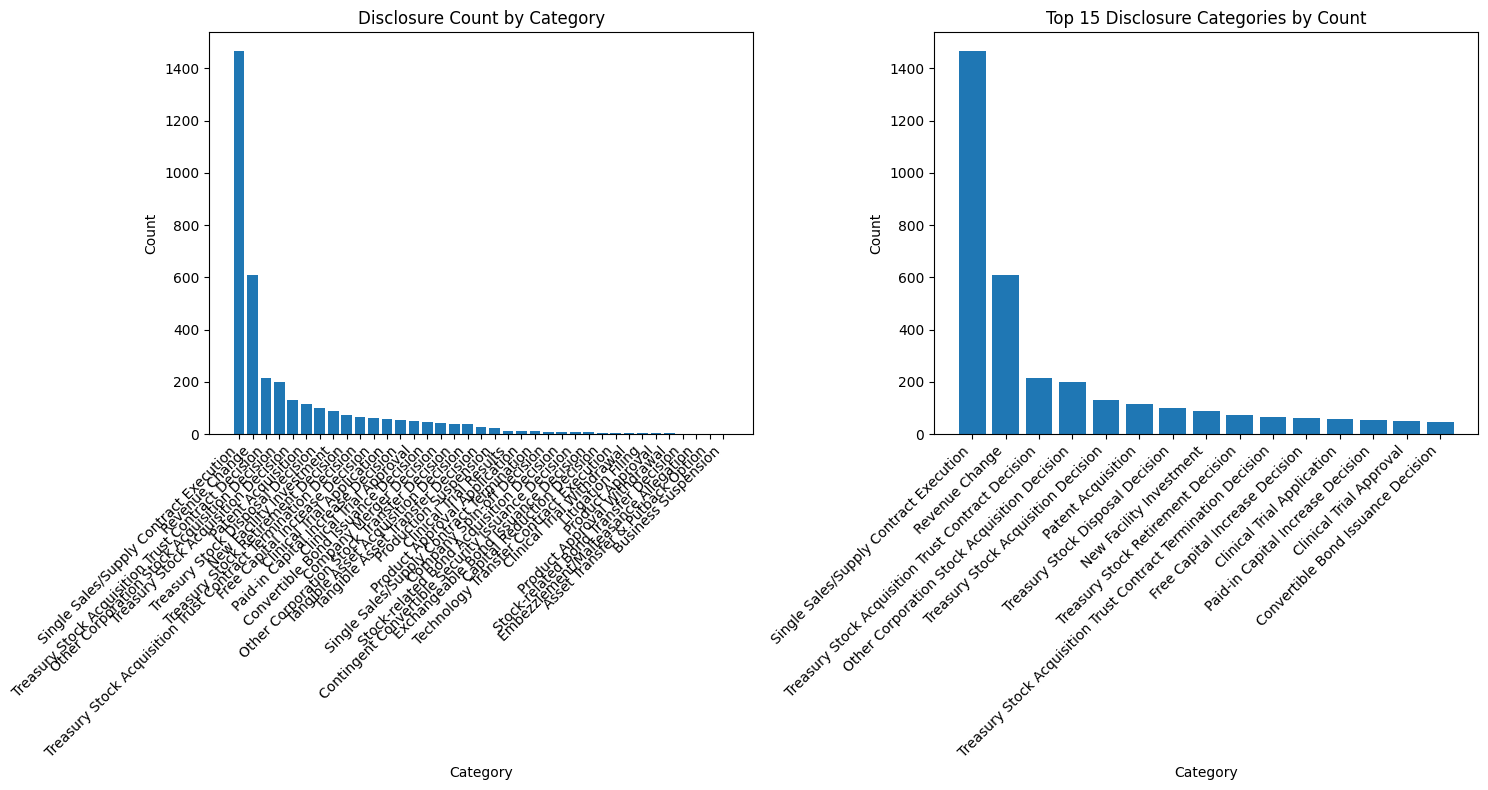

총 37개 카테고리, 총 3584건의 공시

상위 15개 카테고리:
disclosure_type
단일판매ㆍ공급계약체결           1465
매출액변동                  609
자기주식취득 신탁계약 체결 결정      216
타법인 주식 및 출자증권 양수결정     199
자기주식 취득 결정             130
특허권취득                  116
자기주식 처분 결정              98
신규시설투자                  87
자기주식 소각 결정              72
자기주식취득 신탁계약 해지 결정       66
무상증자 결정                 61
임상 계획 신청                58
유상증자 결정                 54
임상 계획 승인                48
전환사채권 발행결정              45
Name: count, dtype: int64


In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from config import keywords



df_with_returns = target_df.copy()
category_counts = df_with_returns['disclosure_type'].value_counts()

# 카테고리별 건수 시각화
plt.figure(figsize=(15, 8))
category_counts_sorted = category_counts.sort_values(ascending=False)

# 한글 카테고리를 영어로 매핑
category_counts_sorted_en = category_counts_sorted.copy()
category_counts_sorted_en.index = [category_mapping.get(cat, cat) for cat in category_counts_sorted_en.index]

plt.subplot(1, 2, 1)
plt.bar(range(len(category_counts_sorted_en)), category_counts_sorted_en.values)
plt.title('Disclosure Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(range(len(category_counts_sorted_en)), category_counts_sorted_en.index, rotation=45, ha='right')

# 상위 15 카테고리만 별도 표시
plt.subplot(1, 2, 2)
top_15 = category_counts_sorted_en.head(15)
plt.bar(range(len(top_15)), top_15.values)
plt.title('Top 15 Disclosure Categories by Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(range(len(top_15)), top_15.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

print(f"총 {len(category_counts)}개 카테고리, 총 {category_counts.sum()}건의 공시")
print("\n상위 15개 카테고리:")
print(category_counts_sorted.head(15))

In [16]:

# category_mapping의 순서를 지키기 위해 OrderedDict의 순서를 따른다
import pandas as pd

# 각 카테고리가 몇 건씩 있는지 계산
category_counts = df_with_returns['disclosure_type'].value_counts()

category_df = pd.DataFrame([
    {
        "category_kr": cat, 
        "category_en": category_mapping[cat],
        "observations": category_counts.get(cat, 0)
    }
    for cat in category_mapping.keys()
    if cat in df_with_returns['disclosure_type'].unique()
])

category_df = category_df.sort_values("observations", ascending=False)
display(category_df)



,category_kr,category_en,observations
27,단일판매ㆍ공급계약체결,Single Sales/Supply Contract Execution,1465
29,매출액변동,Revenue Change,609
16,자기주식취득 신탁계약 체결 결정,Treasury Stock Acquisition Trust Contract Deci...,216
20,타법인 주식 및 출자증권 양수결정,Other Corporation Stock Acquisition Decision,199
13,자기주식 취득 결정,Treasury Stock Acquisition Decision,130
30,특허권취득,Patent Acquisition,116
14,자기주식 처분 결정,Treasury Stock Disposal Decision,98
31,신규시설투자,New Facility Investment,87
15,자기주식 소각 결정,Treasury Stock Retirement Decision,72
17,자기주식취득 신탁계약 해지 결정,Treasury Stock Acquisition Trust Contract Term...,66


In [17]:
df_with_returns.isnull().sum()
df_with_returns.describe()
df_with_returns.info()

df_with_returns.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Columns: 141 entries, event_id to CAR_60m
dtypes: datetime64[ns, UTC](1), float64(135), int64(2), object(3)
memory usage: 3.9+ MB


,event_id,event_ts,abn_ret_minus_59m,abn_ret_minus_58m,abn_ret_minus_57m,abn_ret_minus_56m,abn_ret_minus_55m,abn_ret_minus_54m,abn_ret_minus_53m,abn_ret_minus_52m,...,CAR_6m,CAR_7m,CAR_8m,CAR_9m,CAR_10m,CAR_20m,CAR_30m,CAR_40m,CAR_50m,CAR_60m
0,325691,2022-07-01 10:03:00+00:00,-0.007148,-0.005285,0.000471,-0.012082,0.008214,-0.002471,0.000944,-0.006312,...,-0.000950,-0.008553,-0.004737,-0.001476,0.005192,-0.008342,-0.003640,0.009501,-0.007204,-0.008546
1,325686,2022-07-01 10:24:00+00:00,0.000476,0.000476,-0.007229,-0.000477,-0.002379,-0.001425,-0.000949,0.008139,...,0.017700,0.015332,0.019134,0.015332,0.021047,0.040364,0.030922,0.029071,0.039132,0.031948
2,325685,2022-07-01 10:26:00+00:00,0.002865,-0.000477,-0.002379,0.000009,0.003340,0.002373,-0.000476,-0.002376,...,-0.001933,-0.002421,-0.003380,-0.000979,0.000474,-0.004271,0.006729,0.024854,0.021497,0.021057
3,325676,2022-07-01 10:43:00+00:00,-0.000162,-0.001130,-0.000968,0.000322,-0.000967,-0.000644,0.000161,-0.003180,...,0.017782,0.012287,0.018564,0.009611,0.009698,0.012785,0.011305,0.009232,0.003966,0.000721
4,325672,2022-07-01 11:03:00+00:00,0.000968,0.002677,-0.000773,-0.001581,-0.000484,-0.001068,0.000162,-0.001101,...,0.000285,0.001671,0.000899,0.001384,-0.000201,0.002646,0.008496,0.010007,0.009466,0.007764


In [18]:
df_with_returns['label'].value_counts()

label
 1    2251
 0    1041
-1     292
Name: count, dtype: int64

# AI Inference

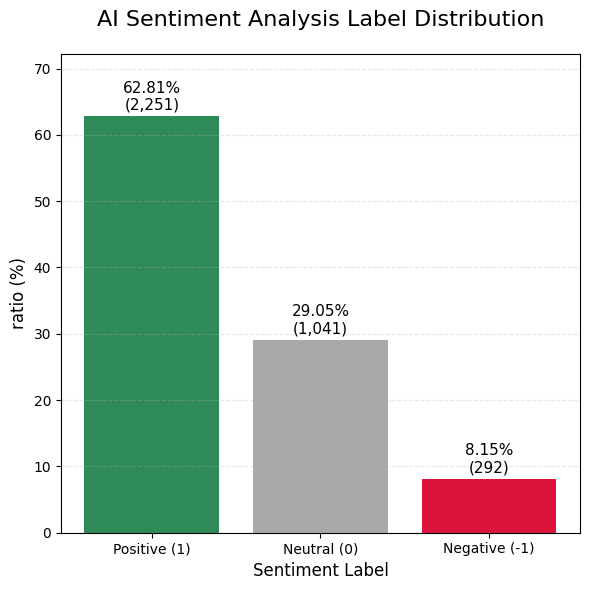

=== AI Sentiment Analysis Label Distribution ===
positive: 2,251건 (62.81%)
neutral: 1,041건 (29.05%)
negative: 292건 (8.15%)


In [19]:
# label 비율 시각화
plt.figure(figsize=(6, 6))

# label 비율 계산
label_counts = df_with_returns['label'].value_counts()
label_ratios = (label_counts / len(df_with_returns) * 100).round(2)

# 색상 매핑 (라벨 순서에 맞게)
colors = ['#2E8B57', '#A9A9A9', '#DC143C']  # 1: positive(초록), 0: neutral(회색), -1: negative(빨강)

# x축 라벨 설정: 1=Positive(초록), 0=Neutral(회색), -1=Negative(빨강)
label_order = [1, 0, -1]
label_names = ['Positive (1)', 'Neutral (0)', 'Negative (-1)']

# 막대 그래프 생성
bars = plt.bar(range(len(label_order)), [label_ratios.get(l, 0) for l in label_order], color=colors)

# 막대 위에 비율 표시
for i, label in enumerate(label_order):
    if label in label_counts:
        ratio = label_ratios[label]
        count = label_counts[label]
        plt.text(i, ratio + 0.5, f'{ratio}%\n({count:,})',
                 ha='center', va='bottom', fontsize=11)

plt.title('AI Sentiment Analysis Label Distribution', fontsize=16, pad=20)
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('ratio (%)', fontsize=12)
plt.ylim(0, max(label_ratios.values) * 1.15)

plt.xticks(range(len(label_order)), label_names)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("=== AI Sentiment Analysis Label Distribution ===")
for i, label in enumerate(label_order):
    if label in label_counts:
        count = label_counts[label]
        ratio = label_ratios[label]
        print(f"{label_names[i].split()[0].lower()}: {count:,}건 ({ratio}%)")


# Event Study

## 10 minute interval

In [20]:
for m in range(-59, 61):
    cols = [
        f"abn_ret_minus_{abs(i)}m" if i < 0 else f"abn_ret_{i}m"
        for i in range(-59, m+1)
    ]

    # 만약 필요한 값 중 하나라도 NaN이면 → 전체 CAR이 NaN
    # skipna=False → NaN 있는 경우 결과 NaN
    df_with_returns[f"CAR_event_{m}"] = df_with_returns[cols].sum(axis=1, skipna=False)


/var/folders/5r/tdks4c2x5vgdpqkw390mgzqm0000gn/T/ipykernel_4776/3022879054.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_returns[f"CAR_event_{m}"] = df_with_returns[cols].sum(axis=1, skipna=False)
/var/folders/5r/tdks4c2x5vgdpqkw390mgzqm0000gn/T/ipykernel_4776/3022879054.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_returns[f"CAR_event_{m}"] = df_with_returns[cols].sum(axis=1, skipna=False)
/var/folders/5r/tdks4c2x5vgdpqkw390mgzqm0000gn/T/ipykernel_4776/3022879054.py:9: PerformanceWarning: DataFrame i

In [21]:
df_with_returns.describe()

,event_id,abn_ret_minus_59m,abn_ret_minus_58m,abn_ret_minus_57m,abn_ret_minus_56m,abn_ret_minus_55m,abn_ret_minus_54m,abn_ret_minus_53m,abn_ret_minus_52m,abn_ret_minus_51m,...,CAR_event_51,CAR_event_52,CAR_event_53,CAR_event_54,CAR_event_55,CAR_event_56,CAR_event_57,CAR_event_58,CAR_event_59,CAR_event_60
count,3584.000000,3253.000000,3259.000000,3268.000000,3272.000000,3281.000000,3290.000000,3296.000000,3300.000000,3305.000000,...,2398.000000,2376.000000,2362.000000,2344.000000,2327.000000,2316.000000,2299.000000,2285.000000,2269.000000,2255.000000
mean,352172.170201,-0.000139,0.000034,-0.000009,0.000004,0.000059,0.000128,-0.000012,0.000024,-0.000016,...,0.010863,0.010834,0.010942,0.010828,0.010927,0.010933,0.010969,0.010980,0.011065,0.011033
std,34175.831030,0.002390,0.002390,0.002598,0.002486,0.002477,0.002913,0.002493,0.002326,0.002847,...,0.034977,0.034792,0.034369,0.034613,0.034478,0.034370,0.033714,0.034012,0.034111,0.034193
min,293197.000000,-0.047174,-0.036682,-0.035314,-0.023388,-0.036558,-0.037740,-0.051442,-0.020601,-0.081420,...,-0.288638,-0.297486,-0.252957,-0.245078,-0.226339,-0.239863,-0.232110,-0.247502,-0.258868,-0.254202
25%,321553.750000,-0.000764,-0.000586,-0.000695,-0.000517,-0.000646,-0.000589,-0.000699,-0.000529,-0.000686,...,-0.002759,-0.002724,-0.002820,-0.002870,-0.002651,-0.002833,-0.002911,-0.002901,-0.002883,-0.003080
50%,364213.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005179,0.005345,0.005511,0.005316,0.005316,0.005253,0.005343,0.005206,0.005413,0.005289
75%,379099.000000,0.000465,0.000543,0.000490,0.000570,0.000648,0.000625,0.000603,0.000626,0.000518,...,0.016890,0.016937,0.016683,0.016574,0.016814,0.016796,0.017169,0.016831,0.017377,0.017381
max,408887.000000,0.024687,0.026853,0.051148,0.045564,0.018100,0.087464,0.032305,0.033642,0.027096,...,0.293996,0.293524,0.293996,0.293996,0.294940,0.294940,0.295412,0.294468,0.294940,0.294940


In [22]:
df_with_returns.groupby('label')['abn_ret_40m'].describe()


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
-1,213.0,-0.001157,0.015828,-0.210544,-0.000609,0.0,0.000800,0.016305
0,831.0,0.002249,0.017926,-0.130166,-0.000855,0.0,0.001017,0.202797
1,1874.0,0.002200,0.019176,-0.135220,-0.000876,0.0,0.001055,0.251267


In [23]:
df_with_returns.groupby('label')[
    ['abn_ret_39m', 'abn_ret_40m', 'abn_ret_41m']
].mean()

,abn_ret_39m,abn_ret_40m,abn_ret_41m
label,,,
-1,-0.000335,-0.001157,-0.000253
0,0.000082,0.002249,-0.000058
1,-0.000043,0.002200,0.000022


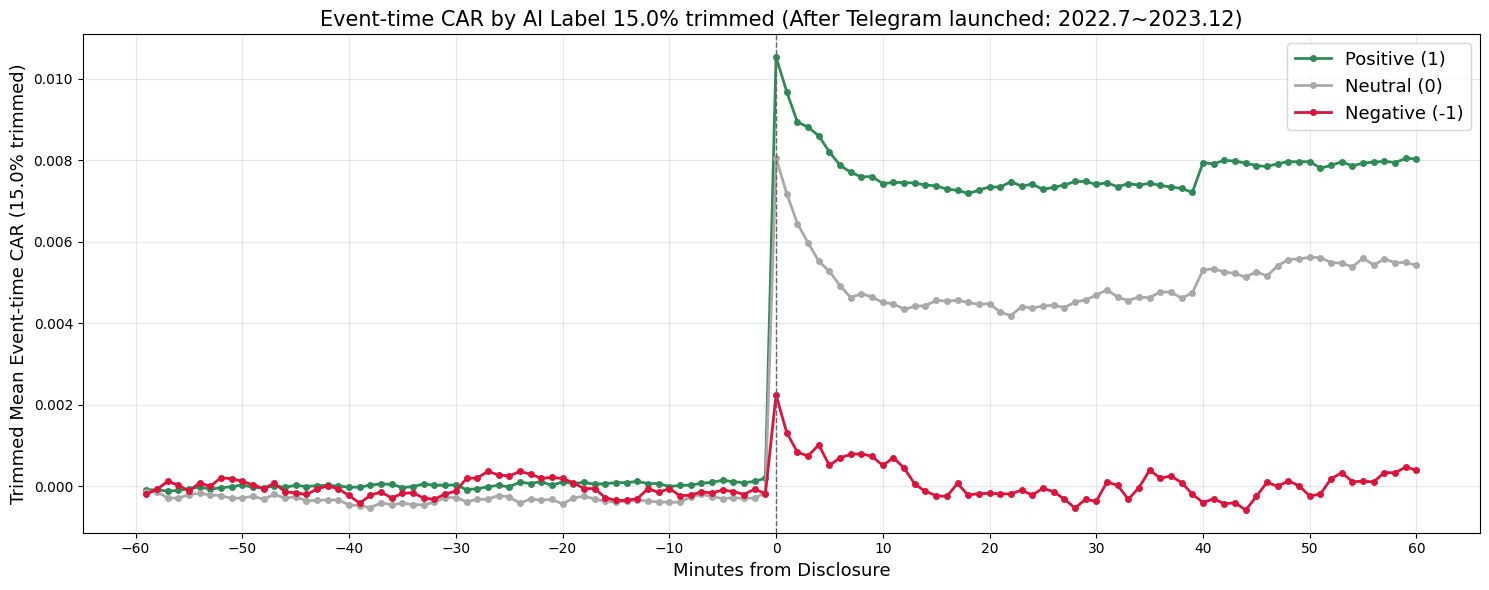

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 모든 분 포함: -60, -59, ..., 0, 1, ..., 60
ret_columns = [f"CAR_event_{m}" for m in range(-60, 61)]

label_order = [1, 0, -1]
colors = ['#2E8B57', '#A9A9A9', '#DC143C']
label_names = ['Positive (1)', 'Neutral (0)', 'Negative (-1)']

alpha = 0.15

def trimmed_mean(series, lower=alpha, upper=1-alpha):
    """위 아래 5% trim한 평균"""
    s = series.dropna()
    if len(s) == 0:
        return np.nan
    q_low, q_high = s.quantile([lower, upper])
    trimmed = s[(s >= q_low) & (s <= q_high)]
    if len(trimmed) == 0:
        return np.nan
    return trimmed.mean()

plt.figure(figsize=(15, 6))

for label, c, name in zip(label_order, colors, label_names):
    grp = df_with_returns[df_with_returns['label'] == label]

    yvals = []
    xvals = []

    for m in range(-60, 61):
        col = f"CAR_event_{m}"
        if col not in grp.columns:
            yvals.append(np.nan)
            xvals.append(m)
            continue

        val = trimmed_mean(grp[col])
        yvals.append(val)
        xvals.append(m)

    plt.plot(
        xvals,
        yvals,
        label=name,
        color=c,
        marker='o',
        linewidth=2,
        markersize=4
    )

plt.axvline(0, color="#666", linestyle="--", lw=1)
plt.legend(fontsize=13)
plt.xticks(range(-60, 61, 10))
plt.xlabel("Minutes from Disclosure", fontsize=13)
plt.ylabel(f"Trimmed Mean Event-time CAR ({alpha*100}% trimmed)", fontsize=13)
plt.title(f"Event-time CAR by AI Label {alpha*100}% trimmed (After Telegram launched: 2022.7~2023.12)", fontsize=15)
plt.grid(alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


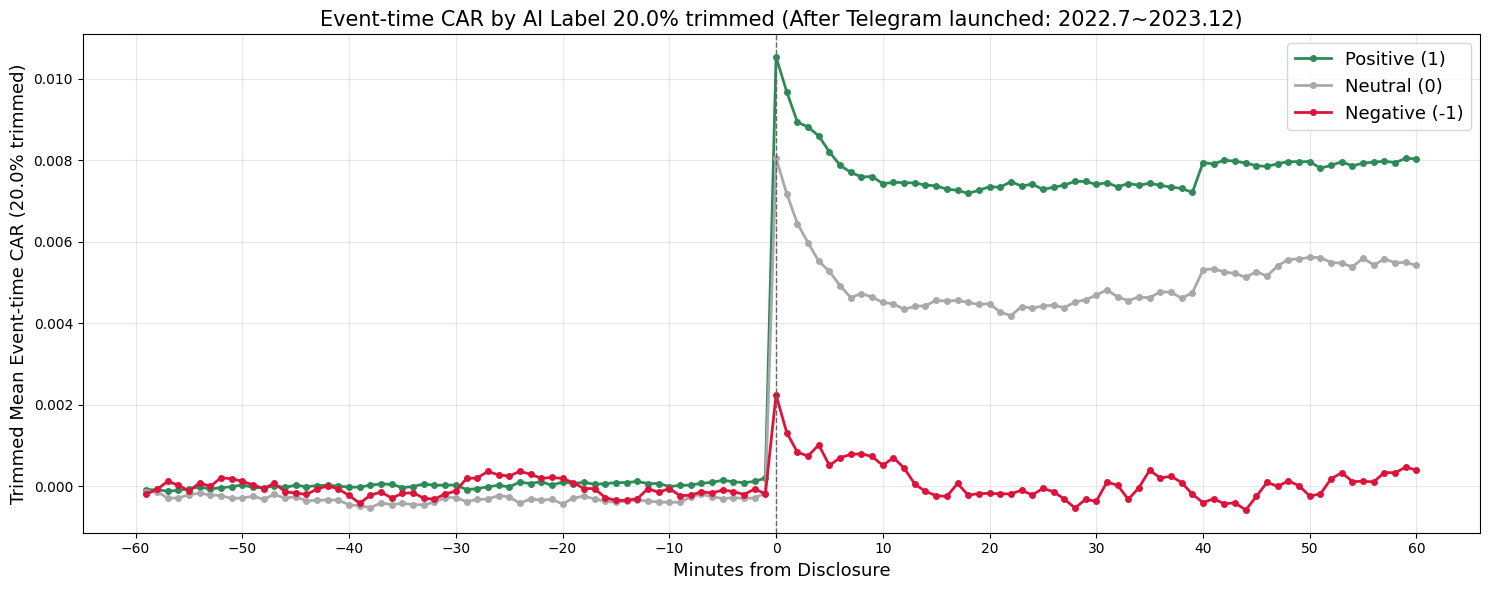

In [25]:
alpha = 0.2

plt.figure(figsize=(15, 6))

for label, c, name in zip(label_order, colors, label_names):
    grp = df_with_returns[df_with_returns['label'] == label]

    yvals = []
    xvals = []

    for m in range(-60, 61):
        col = f"CAR_event_{m}"
        if col not in grp.columns:
            yvals.append(np.nan)
            xvals.append(m)
            continue

        val = trimmed_mean(grp[col])
        yvals.append(val)
        xvals.append(m)

    plt.plot(
        xvals,
        yvals,
        label=name,
        color=c,
        marker='o',
        linewidth=2,
        markersize=4
    )

plt.axvline(0, color="#666", linestyle="--", lw=1)
plt.legend(fontsize=13)
plt.xticks(range(-60, 61, 10))
plt.xlabel("Minutes from Disclosure", fontsize=13)
plt.ylabel(f"Trimmed Mean Event-time CAR ({alpha*100}% trimmed)", fontsize=13)
plt.title(f"Event-time CAR by AI Label {alpha*100}% trimmed (After Telegram launched: 2022.7~2023.12)", fontsize=15)
plt.grid(alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


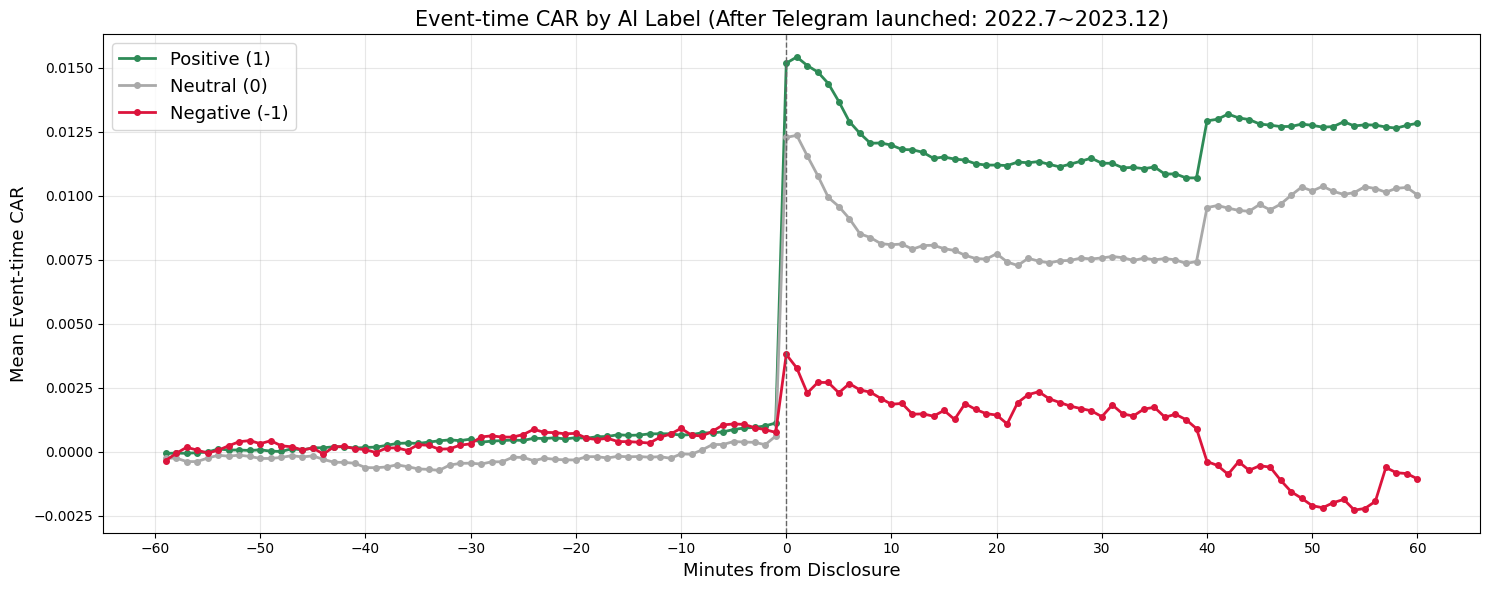

In [26]:
import matplotlib.pyplot as plt

# 모든 분 포함: -60, -59, ..., 0, 1, ..., 60
ret_columns = [f"CAR_event_{m}" for m in range(-60, 61)]

label_order = [1, 0, -1]
colors = ['#2E8B57', '#A9A9A9', '#DC143C']  # 1: positive(초록), 0: neutral(회색), -1: negative(빨강)
label_names = ['Positive (1)', 'Neutral (0)', 'Negative (-1)']

car_time_points = list(range(-60, 61))
car_time_labels = ret_columns

plt.figure(figsize=(15, 6))
for label, c, name in zip(label_order, colors, label_names):
    grp = df_with_returns[df_with_returns['label'] == label]
    # 혹시 열이 전부 없는 경우 에러 방지: 존재하는 컬럼만 사용
    available_cols = [col for col in car_time_labels if col in grp.columns]
    if len(available_cols) == 0:
        continue
    yvals = grp[available_cols].mean()
    xvals = [int(col.replace("CAR_event_", "")) for col in available_cols]
    plt.plot(
        xvals,
        yvals.values,
        label=name,
        color=c,
        marker='o',
        linewidth=2,
        markersize=4
    )

plt.axvline(0, color="#666", linestyle="--", lw=1)
plt.legend(fontsize=13)
plt.xticks(range(-60, 61, 10))
plt.xlabel("Minutes from Disclosure", fontsize=13)
plt.ylabel("Mean Event-time CAR", fontsize=13)
plt.title("Event-time CAR by AI Label (After Telegram launched: 2022.7~2023.12)", fontsize=15)
plt.grid(alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


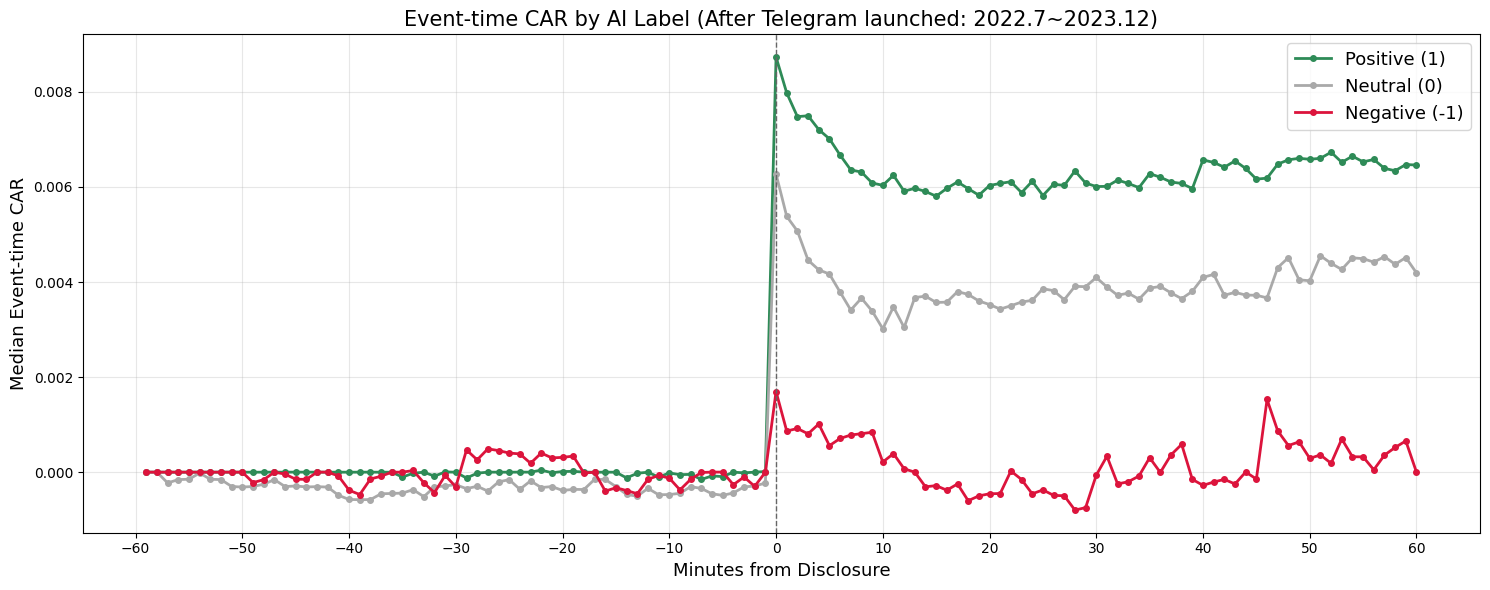

In [27]:
import matplotlib.pyplot as plt

# 모든 분 포함: -60, -59, ..., 0, 1, ..., 60
ret_columns = [f"CAR_event_{m}" for m in range(-60, 61)]

label_order = [1, 0, -1]
colors = ['#2E8B57', '#A9A9A9', '#DC143C']  # 1: positive(초록), 0: neutral(회색), -1: negative(빨강)
label_names = ['Positive (1)', 'Neutral (0)', 'Negative (-1)']

car_time_points = list(range(-60, 61))
car_time_labels = ret_columns

plt.figure(figsize=(15, 6))
for label, c, name in zip(label_order, colors, label_names):
    grp = df_with_returns[df_with_returns['label'] == label]
    # 혹시 열이 전부 없는 경우 에러 방지: 존재하는 컬럼만 사용
    available_cols = [col for col in car_time_labels if col in grp.columns]
    if len(available_cols) == 0:
        continue
    yvals = grp[available_cols].median()
    xvals = [int(col.replace("CAR_event_", "")) for col in available_cols]
    plt.plot(
        xvals,
        yvals.values,
        label=name,
        color=c,
        marker='o',
        linewidth=2,
        markersize=4
    )

plt.axvline(0, color="#666", linestyle="--", lw=1)
plt.legend(fontsize=13)
plt.xticks(range(-60, 61, 10))
plt.xlabel("Minutes from Disclosure", fontsize=13)
plt.ylabel("Median Event-time CAR", fontsize=13)
plt.title("Event-time CAR by AI Label (After Telegram launched: 2022.7~2023.12)", fontsize=15)
plt.grid(alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


# 공시 종류별 감성 분포

In [28]:
df_with_returns.groupby('disclosure_type')[ret_columns].mean().round(2)


KeyError: "Columns not found: 'CAR_event_-60'"

In [ ]:
df_with_returns.groupby('disclosure_type')[ret_columns].std()


In [ ]:
# 공시 종류별 sentiment 분포 분석 (disclosure_type 기준)
disclosure_sentiment = df_with_returns.groupby(['disclosure_type', 'label']).size().unstack(fill_value=0)

# label 컬럼 정렬: negative(-1), neutral(0), positive(1) 순서
label_sort_order = [-1, 0, 1]
filtered_columns = [col for col in label_sort_order if col in disclosure_sentiment.columns]
disclosure_sentiment = disclosure_sentiment[filtered_columns]

# 비율로 변환
disclosure_sentiment_pct = disclosure_sentiment.div(disclosure_sentiment.sum(axis=1), axis=0) * 100

# 수치 요약 전체 DataFrame으로 만들어서 출력 (전체 공시 종류)
summary_df = disclosure_sentiment.copy()
for col in disclosure_sentiment_pct.columns:
    summary_df[f"{col}_pct"] = disclosure_sentiment_pct[col].round(1)

# 샘플 개수(행별 합) 기준 내림차순 정렬
summary_df['total_count'] = summary_df[[col for col in [-1, 0, 1] if col in summary_df.columns]].sum(axis=1)
summary_df = summary_df.sort_values('total_count', ascending=False)
summary_df = summary_df.drop(columns=['total_count'])

print("=== 전체 공시 종류별 감정 분포 ===")
summary_df

In [ ]:
# 상위 20개 공시 종류만 선택 (데이터가 많은 순서대로)
top_disclosures = df_with_returns['disclosure_type'].value_counts().head(25).index
disclosure_sentiment_top = disclosure_sentiment.loc[top_disclosures]
disclosure_sentiment_pct_top = disclosure_sentiment_pct.loc[top_disclosures]

# 색상 매핑: negative(빨강), neutral(회색), positive(초록)
sentiment_colors = {
    -1: "#DC143C", # 빨강 (negative)
     0: "#999999", # 회색 (neutral)
     1: "#2E8B57"  # 초록 (positive)
}
plot_colors = [sentiment_colors[col] for col in filtered_columns]

# 시각화 (세로로 2개 배치)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

# 1. 절대 개수
disclosure_sentiment_top.plot(kind='bar', stacked=True, ax=ax1, color=plot_colors)
ax1.set_title('Sentiment Distribution by Disclosure Type (Absolute Count)', fontsize=14)
ax1.set_xlabel('Disclosure Type', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.legend([ 'Negative', 'Neutral', 'Positive' ], title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

x_labels = [category_mapping.get(cat, cat) for cat in top_disclosures]
ax1.set_xticklabels(x_labels, rotation=45, ha='right')

# 2. 비율(%)
disclosure_sentiment_pct_top.plot(kind='bar', stacked=True, ax=ax2, color=plot_colors)
ax2.set_title('Sentiment Distribution by Disclosure Type (Percentage)', fontsize=14)
ax2.set_xlabel('Disclosure Type', fontsize=12)
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.legend([ 'Negative', 'Neutral', 'Positive' ], title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

ax2.set_xticklabels(x_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()
